 # <span style=color:MediumVioletRed>**S07 T01: Tasca del test d'hipòtesis**</span>
 
 _**OBJETIVOS DE LA ACTIVIDAD**_
 
 * Aplicar técnicas estadísticas para validar o rechazar hipótesis de forma objetiva
 * Familiarizarse con el uso de técnicas de validación de hipótesis utilizando distintos tipos de atributos, tanto categóricos como numéricos

In [1]:
import pandas as pd
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

_**DATOS A UTILIZAR**_

El primer set de datos, <span style=color:MediumVioletRed>'all_seasons.csv'</span>, hace referencia a las carácterísticas demográficas generales de los jugadores de la NBA que han formado parte del roster de los equipos entre las temporadas de 1997 hasta 2017. El listado contiene 11.145 entrees, sin embargo muchos jugadores se repiten en las diferentes temporadas, lo que reduce el listado a 2.200 jugadores aproximadamente

In [2]:
sport_df_NBA = pd.read_csv('Data/all_seasons.csv', sep = ',')

In [3]:
sport_df_NBA.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [4]:
sport_df_NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   player_name        11145 non-null  object 
 2   team_abbreviation  11145 non-null  object 
 3   age                11145 non-null  float64
 4   player_height      11145 non-null  float64
 5   player_weight      11145 non-null  float64
 6   college            11145 non-null  object 
 7   country            11145 non-null  object 
 8   draft_year         11145 non-null  object 
 9   draft_round        11145 non-null  object 
 10  draft_number       11145 non-null  object 
 11  gp                 11145 non-null  int64  
 12  pts                11145 non-null  float64
 13  reb                11145 non-null  float64
 14  ast                11145 non-null  float64
 15  net_rating         11145 non-null  float64
 16  oreb_pct           111

 #### <span style=color:MediumVioletRed >**EJERCICIO 1**</span>
 
Calcular el p-valor de un atributo del conjunto de datos y decidir si se rechaza la Hipótesis nula basada en un alfa = 5%
 
 **Procedimiento**
 
 Para poder validar o rechazar una hipótesis sobre un solo atributo del data set necesitaremos seleccionar una atributo numérico y definir una hipótesis inicial que daremos como válida (null hypothesis). Aplicaremos el procedimiento al atributo de altura d elos jugadores
 
 _Altura de los jugadores_
 
 * Null hypothesis: La altura promedio de los jugadores de la NBA entre las temporadas de 1997 y la de 2017 es de 6'6.6'' que es el equivalente a 199cm
 * Hipótesis alternativa: La altura promedio de los jugadores de la NBA es superior a 199cm.
 * Aplicando la función 'ztest' de la librería 'statsmodels.stats.weightstats' obtendremos el valor p buscado y lo compararemos con el Alpha = 5%


In [5]:
heigth_wigth_df = sport_df_NBA.groupby(['player_name'],as_index=False).mean()[['player_name','player_height','player_weight']]

In [6]:
altura_promedio_DF = heigth_wigth_df['player_height'].mean()
print ('Altura promedio de los jugadores de DF:\n{}cm'.format(altura_promedio_DF))

Altura promedio de los jugadores de DF:
200.4326794401094cm


In [7]:
altura_promedio_M0 = 199
p_value = ztest(heigth_wigth_df['player_height'], value = altura_promedio_M0)[1]

In [8]:
if (p_value < 0.05):
    print ('p-Value= {}'.format(p_value))
    print ('CONCLUSIÓN:\nSe rechaza la null hypothesis. La altura promedio de los jugadores de la NBA\nes diferente de {}cm'.format (altura_promedio_M0))
else:
    print ('p-Value= {}'.format(p_value))
    print ('CONCLUSIÓN:\nSe valida la null hypothesis. Los jugadores de la NBA tienen una altura promedio de {}cm'.format (altura_promedio_M0))

p-Value= 1.3209385305929049e-13
CONCLUSIÓN:
Se rechaza la null hypothesis. La altura promedio de los jugadores de la NBA
es diferente de 199cm


_COMENTARIO:_

La altura promedio de los jugadores del DF es de 200.43cm. Si cambiamos el valor de altura_promedio_M0 a 200.4cm podremos comprobar si se rechazaría o se validaría la hipótesis

In [9]:
altura_promedio_M0 = altura_promedio_DF
p_value = ztest(heigth_wigth_df['player_height'], value = altura_promedio_M0)[1]

In [10]:
if (p_value < 0.05):
    print ('p-Value= {}'.format(p_value))
    print ('CONCLUSIÓN:\nSe rechaza la null hypothesis. La altura promedio de los jugadores de la NBA\nes diferente de {}cm'.format (altura_promedio_M0))
else:
    print ('p-Value= {}'.format(p_value))
    print ('CONCLUSIÓN:\nSe valida la null hypothesis. Los jugadores de la NBA tienen una altura promedio de {}cm'.format (altura_promedio_M0))

p-Value= 0.9999999999976561
CONCLUSIÓN:
Se valida la null hypothesis. Los jugadores de la NBA tienen una altura promedio de 200.4326794401094cm


_COMENTARIO:_

Vemos lo precisa que puede llegar a ser la herramienta de p-Value para validar hipótesis. Una diferencia de menos de 1% en la media y una cantidad de datos significativo puede ayudar a validar o rechazar una hipótesis

 #### <span style=color:MediumVioletRed >**EJERCICIO 2**</span>
 
Seleccionar 2 atributos y determinar el p-value para rechazar o validar una hipótesis nula.

En este caso la hipótesis irá dirigida a definir si hay una correlación entre ambos atributos. Seleccionaremos 2 variables categóricas de un nuevo data Set para aplicar la metodología de Chi-Squared Test
 
_**DATOS A UTILIZAR**_

El segundo set de datos, <span style=color:MediumVioletRed>'shot_logs.csv'</span> hace referencia a los lanzamientos realizados por los jugadores de la NBA durante la temporada de 2014-2015. Entre los datos recolectados se contempla información como: quien tomo el lanzamiento, en que parte de la cancha se tomó el lanzamiento, que defensor estaba mas cercano y así una serie de información complementaria referente a cada lanzamiento.


 


In [11]:
shots_df = pd.read_csv ('Data\shot_logs.csv', sep = ',')

In [12]:
shots_df.head()

,GAME_ID1,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,01:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,00:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,00:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


 **Procedimiento**
 
Seleccionaremos 2 atributos categóricos para validar si estan relacionados. En este caso probaremos si el acertar o fallas un lanzamiento depende de la distancia de lanzamiento.

Hipótesis: Acertar o fallar un lanzamiento no depende de la distancia desde la que se lance


In [13]:
def dist_to_can (row):
    if row ['SHOT_DIST'] <= 10:
        return 'short'
    if row ['SHOT_DIST'] <= 20:
        return 'mid'  
    else:
        return 'long'        

In [14]:
sliced_df = shots_df [['SHOT_DIST', 'SHOT_RESULT']]

In [15]:
dist_can = sliced_df.apply (lambda row: dist_to_can(row), axis=1)

In [16]:
sliced_df ['DIST_CAT'] = dist_can

<ipython-input-16-921dbc56e862>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df ['DIST_CAT'] = dist_can


In [17]:
contingency_table = pd.crosstab(sliced_df['DIST_CAT'],sliced_df['SHOT_RESULT'])

In [18]:
contingency_table

SHOT_RESULT,made,missed
DIST_CAT,,
long,15143,27296
mid,11974,17197
short,30788,25671


In [19]:
contigency_pct = pd.crosstab(sliced_df['DIST_CAT'],sliced_df['SHOT_RESULT'], normalize='index')

In [20]:
contigency_pct 

SHOT_RESULT,made,missed
DIST_CAT,,
long,0.356818,0.643182
mid,0.410476,0.589524
short,0.545316,0.454684


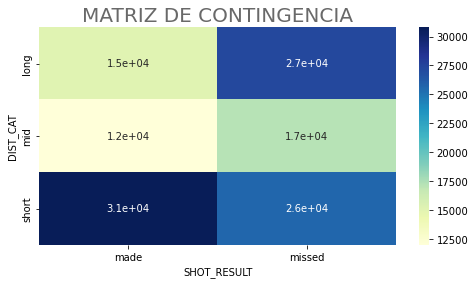

In [21]:
plt.figure(figsize=(8,4)) 

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'DimGray', 'size' : 20}

plt.title("MATRIZ DE CONTINGENCIA", fontdict = fuente_titulo)
sns.heatmap(contingency_table , annot=True, cmap="YlGnBu")
plt.show()

In [24]:
chi_val, p_value, degree_free, expected_val = chi2_contingency(contingency_table) 

In [23]:
if (p_value < 0.05):
    print ('p-Value= {}'.format(p_value))
    print ('CONCLUSIÓN:\nSe rechaza la Null Hypothesis. Hay una posible relación entre el\nresultado del lanzamiento y la zona desde la que se realiza')
else:
    print ('p-Value= {}'.format(p_value))
    print ('CONCLUSIÓN:\nNo hay evidencia para asegurar una relación entre el resultado del lanzamiento y la zona desde la que se realiza')

p-Value= 0.0
CONCLUSIÓN:
Se rechaza la Null Hypothesis. Hay una posible relación entre el
resultado del lanzamiento y la zona desde la que se realiza
